# ISIP HW2
## Thibault Schowing



# Exercise 1 Linear Filtering - [7 Points]

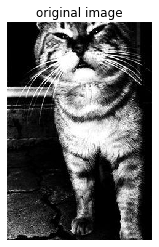

DONE


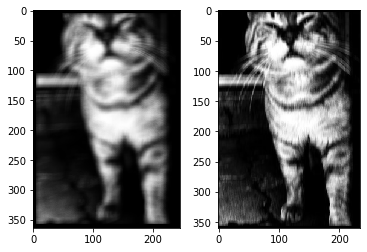

DONE


ValueError: x and y must have same first dimension, but have shapes (20,) and (0,)

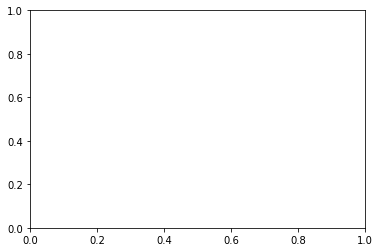

In [86]:
""" 1 Linear filtering """

# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import time
import pdb

# To display plots inline
%matplotlib inline

img = plt.imread('cat.jpg').astype(np.float32)

plt.imshow(img)
plt.axis('off')
plt.title('original image')
plt.show()

# 1.1
def boxfilter(n):
    # this function returns a box filter of size nxn
    ### your code should go here ###
    return 1/n * np.ones((n,n), dtype=float_)


# 1.2
# Implement full convolution
def myconv2(image, filt):
    # This function performs a 2D convolution between image and filt, image being a 2D image. This
    # function should return the result of a 2D convolution of these two images. DO
    # NOT USE THE BUILT IN SCIPY CONVOLVE within this function. You should code your own version of the
    # convolution, valid for both 2D and 1D filters.
    # INPUTS
    # @ image         : 2D image, as numpy array, size mxn
    # @ filt          : 1D or 2D filter of size kxl
    # OUTPUTS
    # img_filtered    : 2D filtered image, of size (m+k-1)x(n+l-1)

    ### your code should go here ###
    
    m = image.shape[0]
    n = image.shape[1]
    k = filt.shape[0]
    
    if(len(filt.shape) > 1):
        l = filt.shape[1]
    else:
        l = 0

    
    # Assumption: the filter has odd shape values
    if(not(k%2) or not(l%2) and l != 0):
        print("Error, filters shape must be odd. ")
        return -1
    
    # left/right margin
    if(l == 0):
        lr = 0
    else:
        lr = int((l-1)/2)
    
    # Top/Down margin
    td = int((k-1)/2)
    
    # Filter sum and reversed filter (reverse the array for the convolution)
    fs = sum(filt.flatten())
    flat_rev_filt = np.flip(filt.flatten())
    
    # pad the image (add margins)
    pimage = np.pad(image, [(td, td), (lr, lr)] , mode='constant') # default = 0
    
    filtered_img = np.zeros((m+k-1,n+l-1))
    
    for x in range(0+td, pimage.shape[0]-td-1):
        for y in range(0+lr, pimage.shape[1]-lr-1):
            window = pimage[x-td:x+td+1, y-lr:y+lr+1]
            val = (1/fs)*np.sum(np.multiply(flat_rev_filt, window.flatten()))
            filtered_img[x,y] = val
    
    return filtered_img


# 1.3
# create a boxfilter of size 11 and convolve this filter with your image - show the result
bsize = 11

### your code should go here ###
a = np.random.randint(5, size=(bsize, bsize))
b = myconv2(img, a)
print("DONE")

a = np.array([1,1,1,1,1,1,1])
c = myconv2(img,a)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(b)
f.add_subplot(1,2, 2)
plt.imshow(c)
plt.show(block=True)

print("DONE")

# 1.4
# create a function returning a 1D gaussian kernel
def gauss1d(sigma, filter_length=11):
    # INPUTS
    # @ sigma         : sigma of gaussian distribution
    # @ filter_length : integer denoting the filter length
    # OUTPUTS
    # @ gauss_filter  : 1D gaussian filter

    ### your code should go here ###
    
    
    return gauss_filter


# 1.5
# create a function returning a 2D gaussian kernel
def gauss2d(sigma, filter_size=11):
    # INPUTS
    # @ sigma         : sigma of gaussian distribution
    # @ filter_size   : integer denoting the filter size
    # OUTPUTS
    # @ gauss2d_filter  : 2D gaussian filter

    ### your code should go here ###

    return gauss2d_filter

# Display a plot using sigma = 3
sigma = 3

### your code should go here ###


# 1.6
# Convoltion with gaussian filter
def gconv(image, sigma):
    # INPUTS
    # image           : 2d image
    # @ sigma         : sigma of gaussian distribution
    # OUTPUTS
    # @ img_filtered  : filtered image with gaussian filter

    ### your code should go here ###

    return img_filtered


# run your gconv on the image for sigma=3 and display the result
sigma = 3

### your code should go here ###


# 1.7
# Convolution with a 2D Gaussian filter is not the most efficient way
# to perform Gaussian convolution with an image. In a few sentences, explain how
# this could be implemented more efficiently and why this would be faster.
#
# HINT: How can we use 1D Gaussians?

### your explanation should go here ###

# 1.8
# Computation time vs filter size experiment
size_range = np.arange(3, 103, 5)
t1d = []
t2d = []
#for size in size_range:

    ### your code should go here ###


# plot the comparison of the time needed for each of the two convolution cases
plt.plot(size_range, t1d, label='1D filtering')
plt.plot(size_range, t2d, label='2D filtering')
plt.xlabel('Filter size')
plt.ylabel('Computation time')
plt.legend(loc=0)
plt.show()
